In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("F:\\NOTES\\Machine Learning\\Codes\\py-master\\ML\\9_decision_tree\\Exercise\\titanic.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Exploratory Data Analysis

In [11]:
print("Total number of passengers : ", len(data))
print("Total number of passengers who survived : ", len(data[data['Survived'] == 1]))

Total number of passengers :  891
Total number of passengers who survived :  342


In [12]:
print("% of passengers survived : ",  round(342/891 * 100, 2), "%")

% of passengers survived :  38.38 %


In [13]:
print("% of men who survived : ",round((len(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]) / len(data)) * 100, 2), "%")
print("% of women who survived : ",round((len(data[(data['Survived'] == 1) & (data['Sex'] == 'female')]) / len(data)) * 100, 2), "%")

% of men who survived :  12.23 %
% of women who survived :  26.15 %


In [14]:
print("% of passengers who survived in 1st class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 1)]) / len(data)) * 100, 2), "%")
print("% of passengers who survived in 2nd class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 2)]) / len(data)) * 100, 2), "%")
print("% of passengers who survived in 3rd class : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 3)]) / len(data)) * 100, 2), "%")


% of passengers who survived in 1st class :  15.26 %
% of passengers who survived in 2nd class :  9.76 %
% of passengers who survived in 3rd class :  13.36 %


In [15]:
print("% of children who survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] < 18)]) / len(data)) * 100, 2), "%")
print("% of adults who survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] > 18)]) / len(data)) * 100, 2), "%")


% of children who survived :  6.85 %
% of adults who survived :  24.69 %


In [16]:
#Check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

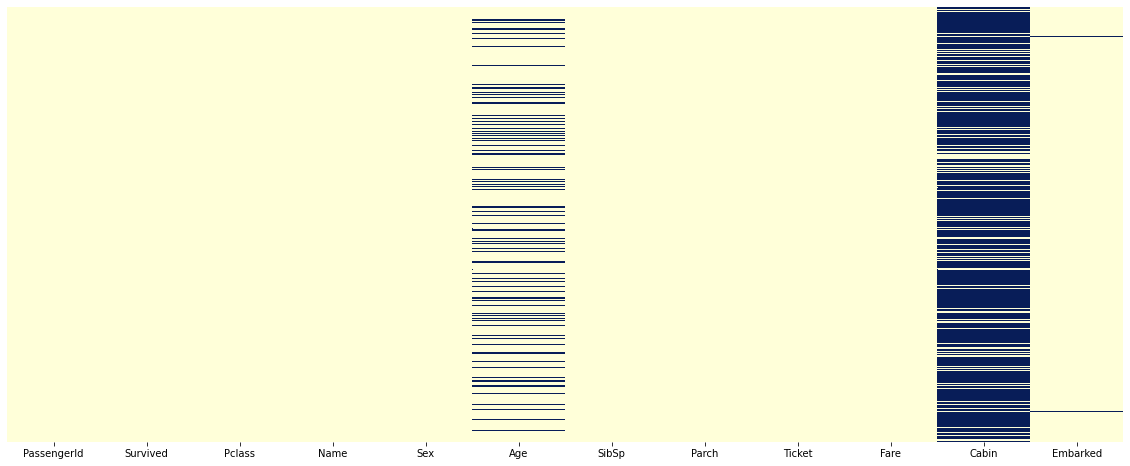

In [17]:
plt.figure(figsize = (20,8))
sns.heatmap(data.isnull(), yticklabels = False, cbar=False, cmap = 'YlGnBu');

In [18]:
pd.DataFrame(round((data.isnull().sum() / data.shape[0]) *100, 3), columns = ['Missing%'])

,Missing%
PassengerId,0.000
Survived,0.000
Pclass,0.000
Name,0.000
Sex,0.000
Age,19.865
SibSp,0.000
Parch,0.000
Ticket,0.000
Fare,0.000


In [19]:
#dropping unnecessary column

data1 = data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
# dropping column having maximum null values

data1.drop('Cabin', axis = 1, inplace = True)

In [21]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:

data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])
data1['Age'] = data1['Age'].fillna(data1['Age'].mean())

In [23]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

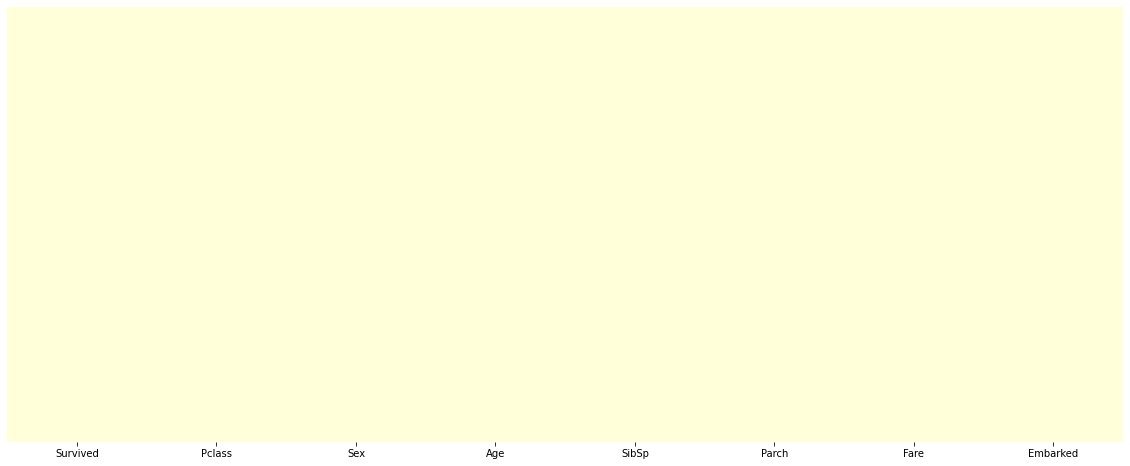

In [25]:
plt.figure(figsize = (20,8))
sns.heatmap(data1.isnull(), yticklabels = False, cbar=False, cmap = 'YlGnBu');

In [26]:
target = data1['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

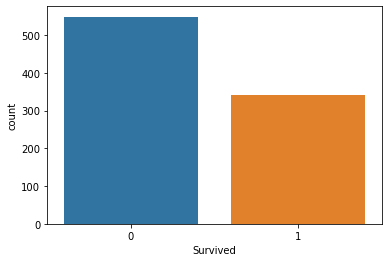

In [27]:
sns.countplot(x = 'Survived', data = data1)

In [28]:
x = data1.drop('Survived', axis = 1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [29]:
#splitting the dataset into categorical and numerical column
x_cat = x.select_dtypes(include = 'object')
x_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [30]:
x_cat.describe()

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [31]:
x_num = x.select_dtypes(exclude = 'object')
x_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [32]:
x_num.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
x_cat_dummy = pd.get_dummies(x_cat, drop_first = True)
x_cat_dummy.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [34]:
new_data = pd.concat([x_num, x_cat_dummy], axis =1)
new_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.20, random_state = 42)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(712, 8)

(179, 8)

(712,)

(179,)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

model1 = LogisticRegression(random_state = 42)
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42)


model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
y_predicted1 = model1.predict(x_test)
y_predicted1
y_predicted2 = model2.predict(x_test)
y_predicted2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
print("Model1 Accuracy : ", accuracy_score(y_test, y_predicted1))
print("Model2 Accuracy : ", accuracy_score(y_test, y_predicted2))

Model1 Accuracy :  0.7988826815642458
Model2 Accuracy :  0.7877094972067039


In [39]:
from sklearn.metrics import confusion_matrix

print("Model1 Confusion Matrix : ")
cm1 = confusion_matrix(y_test, y_predicted1)
cm1
print("Model2 Confusion Matrix : ")
cm2 = confusion_matrix(y_test, y_predicted2)
cm2

Model1 Confusion Matrix : 


array([[89, 16],
       [20, 54]], dtype=int64)

Model2 Confusion Matrix : 


array([[86, 19],
       [19, 55]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

print("Model1 Classification Report : ")
print(classification_report(y_test, y_predicted1))
print("Model2 Classification Report : ")
print(classification_report(y_test, y_predicted2))


Model1 Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Model2 Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

